In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pairwise_evaluator import Pairwise_evaluator
import sys
sys.path.append("../../")
from src.pairwise_fitter import Pairwise_fitter

In [2]:
def fit_and_eval(fname,nssin, seed=42,nsamples=10_000):
    # fit small system
    mod = Pairwise_fitter(nsamples,"../gen",fname, "../output_small")
    mod.setup(43,input_spaced=True)
    mod.fit("ace","../../ace_utils/ace")
    # evaluate model
    model_j_path = f"../output_small/{fname}/{fname}_sep-output-out.j"
    mod = Pairwise_evaluator(model_j_path,nssin)
    mod.load_ising_paramters()
    mod.calc_partitionf()
    return mod.spin_avgs(),mod.spin_correls(), mod




In [95]:
n = 14
fname = f"{n}spin"

n = 15
fname = "15_erdos"

n = 8
fname = "8_erdos"


data_all = np.loadtxt(f"../output_small/{fname}/{fname}_sep-output.p",dtype=np.double)

# data_all = np.loadtxt(f"../output_small/control_data/p7.p",dtype=np.double)

data_si = data_all[:n]
data_sij = data_all[n:]

In [96]:
# model
nruns = 1
si_runs = np.empty((nruns,n))
sij_runs = np.empty((nruns,int(n*(n-1)/2)))
models = []
for r in range(nruns):
    model_si, model_sij, mod = fit_and_eval(fname,n,seed=42)
    models.append(mod)
    si_runs[r,:] = model_si
    sij_runs[r,:] = model_sij


System size N: 8
Beff = 10000.000000
('../../ace_utils/ace', '-d', '../output_small/8_erdos', '-i', '8_erdos_sep-output', '-o', '8_erdos_sep-output-out', '-b', '10000', '-ga')
✓ Process done.
('../../ace_utils/ace', '-d', '../output_small/8_erdos', '-i', '8_erdos_sep-output', '-o', '8_erdos_sep-output-out', '-b', '10000', '-ga')
✓ Process done.
(36,)


In [97]:
data_si.shape, data_sij.shape, model_si.shape, model_sij.shape
si_runs

array([[9.87753072e-05, 4.80433555e-01, 3.56742463e-01, 3.59496932e-01,
        4.85812643e-01, 4.80178468e-01, 4.87264647e-01, 3.62917029e-01]])

In [98]:
si_runs[0].shape

(8,)

In [99]:
si_runs.mean(axis=0)

array([9.87753072e-05, 4.80433555e-01, 3.56742463e-01, 3.59496932e-01,
       4.85812643e-01, 4.80178468e-01, 4.87264647e-01, 3.62917029e-01])

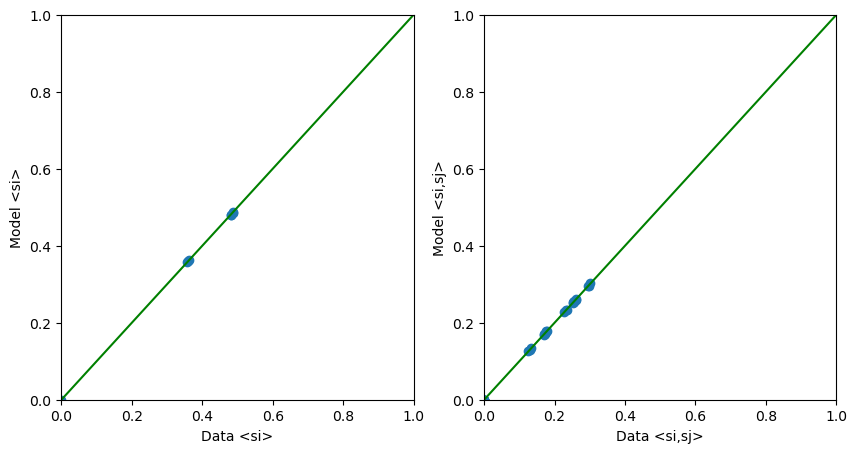

In [100]:


fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# for ax in axs:
#     ax.set_aspect('equal', 'box')

ax = axs[0]

# ax.scatter(data_si, si_runs.mean(axis=0),marker=".")
ax.scatter(data_si, model_si,marker="o")

ax.set_xlabel('Data <si>')
ax.set_ylabel('Model <si>')

ax = axs[1]


ax.scatter(data_sij, sij_runs.mean(axis=0),marker="o")
ax.set_xlabel('Data <si,sj>')
ax.set_ylabel('Model <si,sj>')

for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.plot([0, 1], [0, 1], color='green') 



plt.show()


### Probabilities of the observed states scatter plot

In [121]:
# for all observed states in the training data, compute the probabilities P(s)
# then compute the proabability under the model

# read .dat file
fname = ""
states_data = np.loadtxt(f"../gen/{fname}.dat", dtype=int)
mod = models[0]

In [122]:
# model_P = np.apply_along_axis(mod.predict_with_Z,1,states_data)

In [123]:
v,c = np.unique(states_data, axis=0,return_counts=True)

In [124]:
del states_data

In [125]:
# calculate the model counts on the unique values
model_P= np.apply_along_axis(mod.predict_with_Z,1,v)

In [126]:
data_P = c/np.sum(c)

In [119]:
np.max([data_P,model_P])

0.09551739406383836

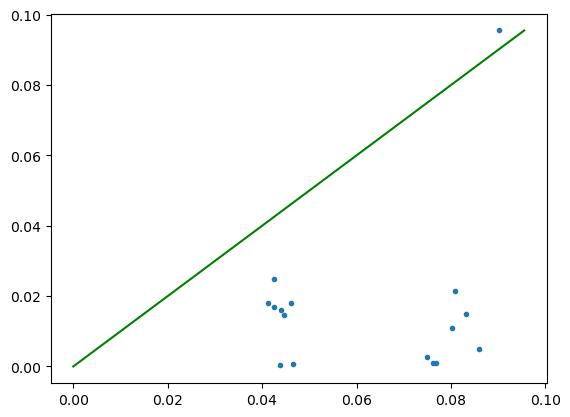

In [120]:
fig, axs = plt.subplots(1,1)
axs = [axs]
plt.scatter(data_P,model_P,marker=".")
for ax in axs:
    ax.plot([0, np.max([data_P,model_P])], [0, np.max([data_P,model_P])], color='green') 



In [57]:
c.shape

(891,)

In [58]:
# c[np.where((v==states_data[:,None]).all(-1))[1]] #https://stackoverflow.com/questions/38674027/find-the-row-indexes-of-several-values-in-a-numpy-array

array([3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 4, 2, 3, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 2, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 1, 4, 1, 1, 2, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 3, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
i = (idc[0])
v[i], states_data[i]

(array([0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]))

In [ ]:
np.where(v[0]==v)[0]
counts = np.zeros(states_data.shape[0])
for row in v:
    idc = np.where(states_data==v)[0]
    counts[idc] = idc

array([   0,    0,    0, ..., 4771, 4771, 4772])